# **Proyecto 2**

Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Lectura dataframe

In [5]:
df = pd.read_csv('/synergy_logistics_database.csv')

**Rutas de importación y exportación**

In [6]:
# Separa dataframe en imports y exports
imports = df[df['direction'] == 'Imports']
exports = df[df['direction'] == 'Exports']

In [7]:
# Agrupar y contar por rutas de exportación
rutas_export = exports.groupby(['origin', 'destination','transport_mode'])
# Ordena diez rutas con mayor demanda
rutas_export.count()['total_value'].sort_values(ascending=False).head(10)

origin       destination  transport_mode
South Korea  Vietnam      Sea               497
USA          Netherlands  Sea               436
Netherlands  Belgium      Road              374
China        Mexico       Air               330
Japan        Brazil       Sea               306
Germany      France       Road              299
South Korea  Japan        Sea               279
Australia    Singapore    Sea               273
Canada       Mexico       Rail              261
China        Spain        Air               250
Name: total_value, dtype: int64

In [8]:
# Agrupar y contar por rutas de importación
rutas_import = imports.groupby(['origin', 'destination','transport_mode'])
# Ordena diez rutas con mayor demanda
rutas_import.count()['total_value'].sort_values(ascending=False).head(10)

origin     destination           transport_mode
Singapore  Thailand              Sea               273
Germany    China                 Sea               233
China      Japan                 Air               210
Japan      Mexico                Sea               206
Malaysia   Thailand              Rail              195
China      Thailand              Road              145
Spain      Germany               Road              142
China      United Arab Emirates  Sea               114
Brazil     China                 Sea               113
USA        Thailand              Sea               109
Name: total_value, dtype: int64

**Medio de transporte utilizado**

In [11]:
# Medio de transporte utilizado en importaciones obteniendo valor total 
imports_transport = imports.groupby(by=['transport_mode']).sum().groupby(level=[0]).cumsum()['total_value'].sort_values(ascending=False)
# Medio de transporte utilizado en exportaciones obteniendo valor total
exports_transport = exports.groupby(by=['transport_mode']).sum().groupby(level=[0]).cumsum()['total_value'].sort_values(ascending=False)
print(imports_transport)
print(exports_transport)


transport_mode
Sea     34938000000
Rail     9123000000
Road     5990000000
Air      5477000000
Name: total_value, dtype: int64
transport_mode
Sea     65592622000
Rail    34505043000
Air     32785147000
Road    27280486000
Name: total_value, dtype: int64


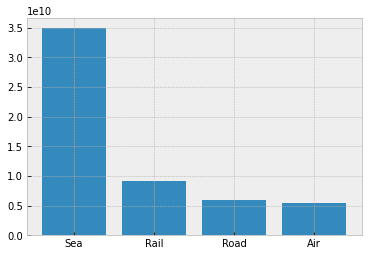

In [16]:
# Gráficas de resultados medios de transporte 
plt.style.use("bmh")                   
plt.bar(imports_transport.index, imports_transport) 
plt.show()                               
plt.close('all')

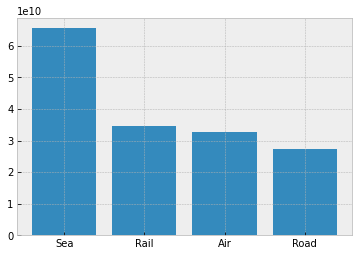

In [17]:
# Gráficas de resultados medios de transporte                 
plt.bar(exports_transport.index, exports_transport) 
plt.show()                               
plt.close('all')

**Valor total de importaciones y exportaciones**

In [12]:
# Obtenemos el total_value de importaciones y exportaciones
total_imports = int(imports['total_value'].sum())
total_exports = int(exports['total_value'].sum())

In [14]:
# Nuevo dataframe para obtener porcentajes de importaciones por país
imports_pais = pd.DataFrame(imports.groupby(by=['origin']).sum().groupby(level=[0]).cumsum()['total_value'].sort_values(ascending=False))
# Celda para porcentajes 
imports_pais['porcentaje'] = imports_pais['total_value']*100/total_imports
# Celda para frecuencia acumulada
imports_pais['acum'] = (imports_pais['porcentaje']).cumsum()
print(imports_pais[:8])

             total_value  porcentaje       acum
origin                                         
China        12233000000   22.030327  22.030327
Japan         8094000000   14.576430  36.606757
USA           5291000000    9.528526  46.135283
Mexico        4621000000    8.321928  54.457211
Germany       4250000000    7.653796  62.111007
Singapore     4017000000    7.234188  69.345195
South Korea   3889000000    7.003674  76.348869
Malaysia      3560000000    6.411180  82.760049


In [15]:
# Nuevo dataframe para obtener porcentajes de importaciones por país
exports_pais = pd.DataFrame(exports.groupby(by=['origin']).sum().groupby(level=[0]).cumsum()['total_value'].sort_values(ascending=False))
# Celda para porcentajes 
exports_pais['porcentaje'] = exports_pais['total_value']*100/total_exports
# Celda para frecuencia acumulada
exports_pais['acum'] = (exports_pais['porcentaje']).cumsum()
print(exports_pais[:8])

             total_value  porcentaje       acum
origin                                         
China        32977046000   20.589640  20.589640
France       18614332000   11.622096  32.211736
USA          18355306000   11.460370  43.672105
South Korea  14621146000    9.128899  52.801004
Russia       13223000000    8.255949  61.056953
Japan        11948976000    7.460496  68.517449
Germany      11343233000    7.082292  75.599741
Canada       10684000000    6.670692  82.270433
